In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [66]:
# Get the stock data
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
df = DataReader('AAPL', data_source='yahoo', start=start, end=end)

# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-23,20.595358,19.879286,20.378929,20.417856,9.665292e+08,17.483278
2012-04-24,20.274643,19.821428,20.093214,20.010000,1.076149e+09,17.134050
2012-04-25,22.071428,21.642857,21.987143,21.785713,9.057776e+08,18.654545
2012-04-26,21.953215,21.504642,21.938213,21.703571,5.360684e+08,18.584211
2012-04-27,21.649286,21.446428,21.609644,21.535713,4.067224e+08,18.440477
...,...,...,...,...,...,...
2022-04-18,166.600006,163.570007,163.919998,165.070007,6.902390e+07,165.070007
2022-04-19,167.820007,163.910004,165.020004,167.399994,6.772380e+07,167.399994
2022-04-20,168.880005,166.100006,168.759995,167.229996,6.792980e+07,167.229996


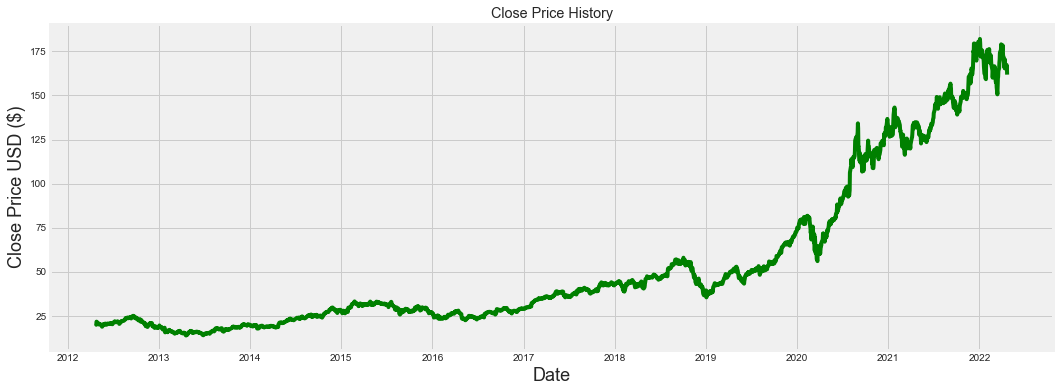

In [87]:
# Plotting Closing price History

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'],color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

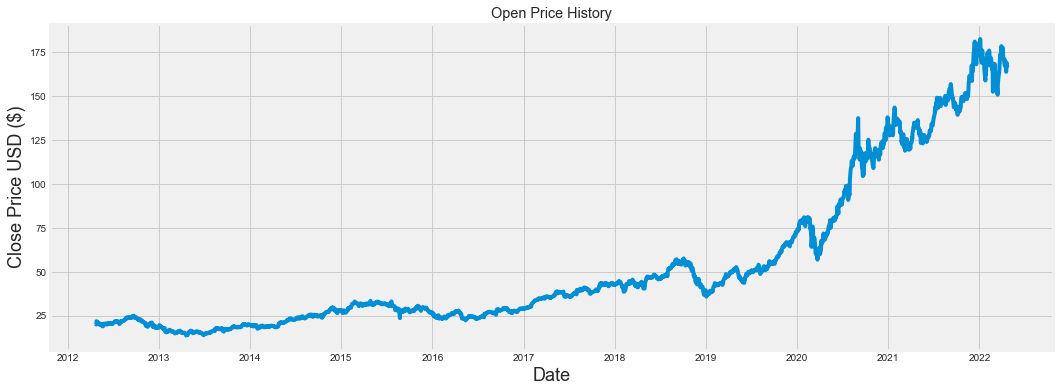

In [68]:
#Plotting Open Price history

plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [69]:
# Create a new dataframe with only the 'Close column 

data = df.filter(['Close'])

# Convert the dataframe to a numpy array

dataset = data.values
print(dataset)

# Get the number of rows to train the model on

training_data_len = int(np.ceil( len(dataset) * .95 ))
print(training_data_len)

[[ 20.41785622]
 [ 20.01000023]
 [ 21.7857132 ]
 ...
 [167.22999573]
 [166.41999817]
 [161.78999329]]
2393


In [70]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0384997 ],
       [0.03607289],
       [0.04663868],
       ...,
       [0.91205653],
       [0.90723691],
       [0.8796876 ]])

In [71]:
# Create the training data set 

train_data = scaled_data[0:int(training_data_len), :]
train_data

array([[0.0384997 ],
       [0.03607289],
       [0.04663868],
       ...,
       [0.80513201],
       [0.80644106],
       [0.80174046]])

In [72]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0384997 , 0.03607289, 0.04663868, 0.04614992, 0.04515114,
       0.04110928, 0.04071615, 0.04153429, 0.04065027, 0.03712904,
       0.03802795, 0.03775169, 0.03796419, 0.03824895, 0.0374393 ,
       0.03563512, 0.03456197, 0.0330553 , 0.02966371, 0.02971896,
       0.03628539, 0.0353695 , 0.03825746, 0.03714392, 0.03650002,
       0.03862083, 0.04008713, 0.03978112, 0.03622376, 0.03692503,
       0.03661477, 0.03844871, 0.03850396, 0.04033151, 0.03838709,
       0.03944748, 0.03859746, 0.03846358, 0.0390161 , 0.04149179,
       0.04183818, 0.0414833 , 0.03976837, 0.04070977, 0.03830208,
       0.03856984, 0.03909472, 0.03793656, 0.04111353, 0.04292408,
       0.04438824, 0.04662594, 0.04576316, 0.04746533, 0.04625831,
       0.04545503, 0.04427987, 0.04556978, 0.04598205, 0.04598843])]
[0.04584391825560563]

[array([0.0384997 , 0.03607289, 0.04663868, 0.04614992, 0.04515114,
       0.04110928, 0.04071615, 0.04153429, 0.04065027, 0.03712904,
       0.03802795, 0.03775169, 0.03

In [73]:
# Convert the x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
# x_train.shape

[[0.0384997  0.03607289 0.04663868 ... 0.04556978 0.04598205 0.04598843]
 [0.03607289 0.04663868 0.04614992 ... 0.04598205 0.04598843 0.04584392]
 [0.04663868 0.04614992 0.04515114 ... 0.04598843 0.04584392 0.04755672]
 ...
 [0.79031615 0.7796653  0.78359244 ... 0.77883228 0.78900711 0.80215693]
 [0.7796653  0.78359244 0.78490148 ... 0.78900711 0.80215693 0.80513201]
 [0.78359244 0.78490148 0.78287844 ... 0.80215693 0.80513201 0.80644106]]
[0.04584392 0.04755672 0.04542741 ... 0.80513201 0.80644106 0.80174046]
[[[0.0384997 ]
  [0.03607289]
  [0.04663868]
  ...
  [0.04556978]
  [0.04598205]
  [0.04598843]]

 [[0.03607289]
  [0.04663868]
  [0.04614992]
  ...
  [0.04598205]
  [0.04598843]
  [0.04584392]]

 [[0.04663868]
  [0.04614992]
  [0.04515114]
  ...
  [0.04598843]
  [0.04584392]
  [0.04755672]]

 ...

 [[0.79031615]
  [0.7796653 ]
  [0.78359244]
  ...
  [0.77883228]
  [0.78900711]
  [0.80215693]]

 [[0.7796653 ]
  [0.78359244]
  [0.78490148]
  ...
  [0.78900711]
  [0.80215693]
  [0.

In [74]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [75]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 34s 14ms/step - loss: 0.0012


In [77]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
test_data

array([[0.78490148],
       [0.78287844],
       [0.79382673],
       [0.79138714],
       [0.79204166],
       [0.78656752],
       [0.78626999],
       [0.78335447],
       [0.78490148],
       [0.80293048],
       [0.80418005],
       [0.81619933],
       [0.81066572],
       [0.78787656],
       [0.7898996 ],
       [0.79876538],
       [0.80780966],
       [0.80727408],
       [0.7997769 ],
       [0.79489772],
       [0.80120497],
       [0.82809966],
       [0.82042399],
       [0.82447006],
       [0.83125324],
       [0.83512091],
       [0.8493418 ],
       [0.83994053],
       [0.83375239],
       [0.8034065 ],
       [0.80685761],
       [0.79834883],
       [0.8037635 ],
       [0.80233543],
       [0.78609149],
       [0.767527  ],
       [0.77044252],
       [0.78484201],
       [0.79067315],
       [0.79120864],
       [0.78198586],
       [0.76139834],
       [0.76687248],
       [0.75895875],
       [0.7658014 ],
       [0.74491635],
       [0.75663818],
       [0.761

In [78]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [79]:
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test)

[[0.78490148 0.78287844 0.79382673 ... 0.80513201 0.80644106 0.80174046]
 [0.78287844 0.79382673 0.79138714 ... 0.80644106 0.80174046 0.80144294]
 [0.79382673 0.79138714 0.79204166 ... 0.80174046 0.80144294 0.8054891 ]
 ...
 [0.87867609 0.8677278  0.86719231 ... 0.90051319 0.89920424 0.91306805]
 [0.8677278  0.86719231 0.86439572 ... 0.89920424 0.91306805 0.91205653]
 [0.86719231 0.86439572 0.93050209 ... 0.91306805 0.91205653 0.90723691]]
[[[0.78490148]
  [0.78287844]
  [0.79382673]
  ...
  [0.80513201]
  [0.80644106]
  [0.80174046]]

 [[0.78287844]
  [0.79382673]
  [0.79138714]
  ...
  [0.80644106]
  [0.80174046]
  [0.80144294]]

 [[0.79382673]
  [0.79138714]
  [0.79204166]
  ...
  [0.80174046]
  [0.80144294]
  [0.8054891 ]]

 ...

 [[0.87867609]
  [0.8677278 ]
  [0.86719231]
  ...
  [0.90051319]
  [0.89920424]
  [0.91306805]]

 [[0.8677278 ]
  [0.86719231]
  [0.86439572]
  ...
  [0.89920424]
  [0.91306805]
  [0.91205653]]

 [[0.86719231]
  [0.86439572]
  [0.93050209]
  ...
  [0.9130

In [80]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.593008840191166

C:\Users\apurb\AppData\Local\Temp/ipykernel_7620/3789257509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


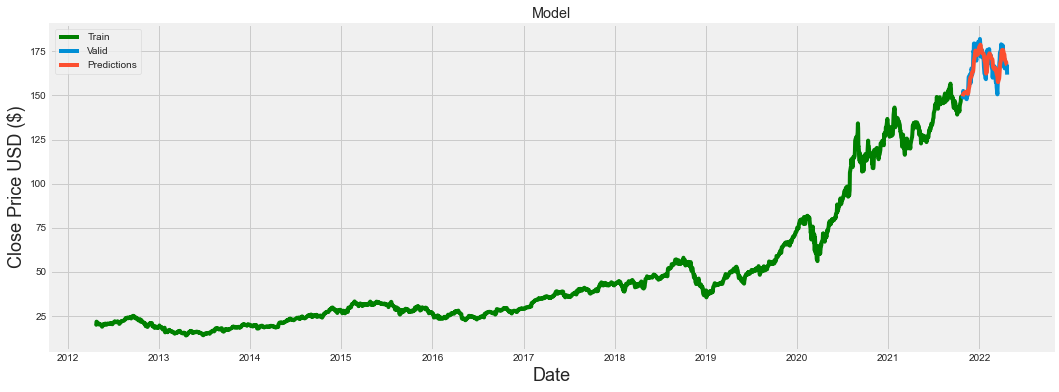

In [93]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],color='green')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [94]:
valid

,Close,Predictions
Date,,
2021-10-25,148.639999,149.523956
2021-10-26,149.320007,149.939301
2021-10-27,148.850006,150.254272
2021-10-28,152.570007,150.393906
2021-10-29,149.800003,151.002960
...,...,...
2022-04-18,165.070007,168.905853
2022-04-19,167.399994,168.028412
2022-04-20,167.229996,167.643173
